In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import os
import zipfile
local_zip = '/content/drive/MyDrive/ML Project/traffic.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/extracted')
zip_ref.close()

In [3]:
batch_size = 50
img_height = 224
img_width = 224

In [4]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/extracted/data/train',
    seed=1337,
    image_size= (img_height, img_width),
    batch_size=batch_size)

test = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/extracted/data/test',
    seed=1337,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/extracted/data/val',
    seed=1337,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [5]:
class_names = train.class_names

In [6]:
img_shape = (img_height, img_width, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [7]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')])

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train, validation_data = validation, epochs = 25)

Epoch 1/25
16/16 [==============================] - 24s 421ms/step - loss: 0.7789 - accuracy: 0.5676 - val_loss: 0.5901 - val_accuracy: 0.7551
Epoch 2/25
16/16 [==============================] - 7s 194ms/step - loss: 0.5273 - accuracy: 0.7649 - val_loss: 0.4829 - val_accuracy: 0.7143
Epoch 3/25
16/16 [==============================] - 6s 207ms/step - loss: 0.3669 - accuracy: 0.8571 - val_loss: 0.3299 - val_accuracy: 0.8571
Epoch 4/25
16/16 [==============================] - 7s 240ms/step - loss: 0.2444 - accuracy: 0.9027 - val_loss: 0.2335 - val_accuracy: 0.8980
Epoch 5/25
16/16 [==============================] - 5s 197ms/step - loss: 0.1543 - accuracy: 0.9279 - val_loss: 0.2513 - val_accuracy: 0.8878
Epoch 6/25
16/16 [==============================] - 5s 198ms/step - loss: 0.0955 - accuracy: 0.9633 - val_loss: 0.2295 - val_accuracy: 0.9184
Epoch 7/25
16/16 [==============================] - 6s 225ms/step - loss: 0.0768 - accuracy: 0.9646 - val_loss: 0.2485 - val_accuracy: 0.8878
Epoch

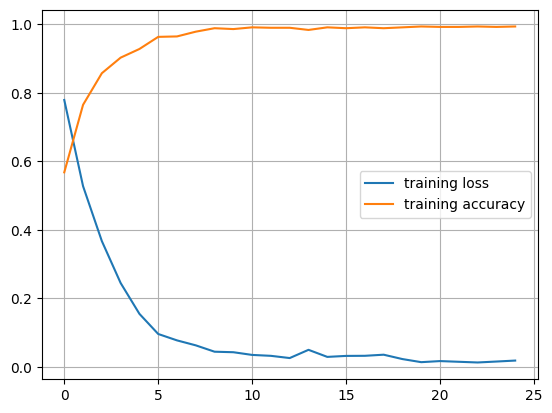

In [10]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

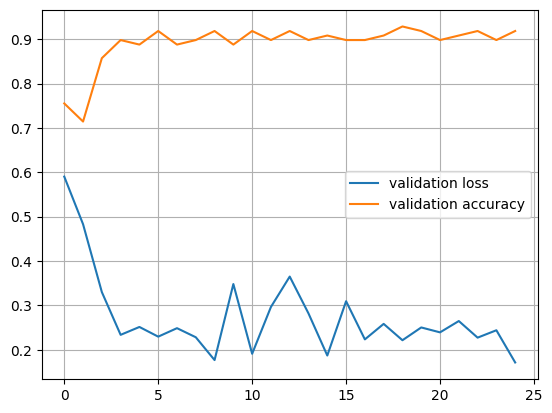

In [11]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

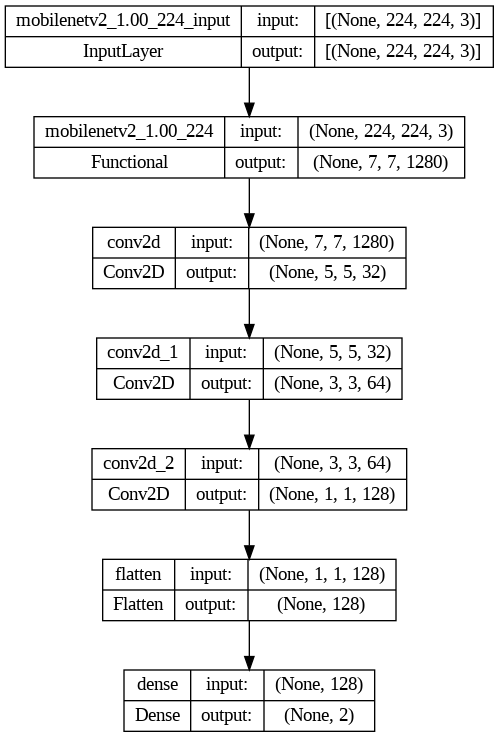

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in test.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

Output hidden; open in https://colab.research.google.com to view.